In [44]:
#imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [46]:
df.shape

(6146, 26)

In [47]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,0.0,0.0,0.0,1.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,0.0,0.0,0.0,1.0,0.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           6146 non-null   object 
 1   passanger             6146 non-null   object 
 2   weather               6146 non-null   object 
 3   temperature           6146 non-null   int64  
 4   time                  6146 non-null   object 
 5   coupon                6146 non-null   object 
 6   expiration            6145 non-null   object 
 7   gender                6145 non-null   object 
 8   age                   6145 non-null   object 
 9   maritalStatus         6145 non-null   object 
 10  has_children          6145 non-null   float64
 11  education             6145 non-null   object 
 12  occupation            6145 non-null   object 
 13  income                6145 non-null   object 
 14  car                   65 non-null     object 
 15  Bar                  

In [49]:
df.drop(columns=['car','toCoupon_GEQ5min']) #dropped 'car' column as it has very few non-null values

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0.0,0.0,0.0,1.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0.0,0.0,0.0,1.0,0.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1.0,0.0,0.0,1.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1.0,0.0,0.0,1.0,0.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Male,46,Married partner,...,never,never,less1,4~8,1~3,1.0,0.0,0.0,1.0,0.0
6142,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,1d,Male,46,Married partner,...,never,never,less1,4~8,1~3,0.0,0.0,0.0,1.0,1.0
6143,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Male,46,Married partner,...,never,never,less1,4~8,1~3,0.0,0.0,0.0,1.0,0.0
6144,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,1d,Male,46,Married partner,...,never,never,less1,4~8,1~3,1.0,0.0,0.0,1.0,1.0


In [50]:
df.duplicated().sum()

np.int64(36)

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
#imputed values for columns with missing values using Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']] = imputer.fit_transform(df[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6110 entries, 0 to 6145
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           6110 non-null   object 
 1   passanger             6110 non-null   object 
 2   weather               6110 non-null   object 
 3   temperature           6110 non-null   int64  
 4   time                  6110 non-null   object 
 5   coupon                6110 non-null   object 
 6   expiration            6109 non-null   object 
 7   gender                6109 non-null   object 
 8   age                   6109 non-null   object 
 9   maritalStatus         6109 non-null   object 
 10  has_children          6109 non-null   float64
 11  education             6109 non-null   object 
 12  occupation            6109 non-null   object 
 13  income                6109 non-null   object 
 14  car                   65 non-null     object 
 15  Bar                   6110

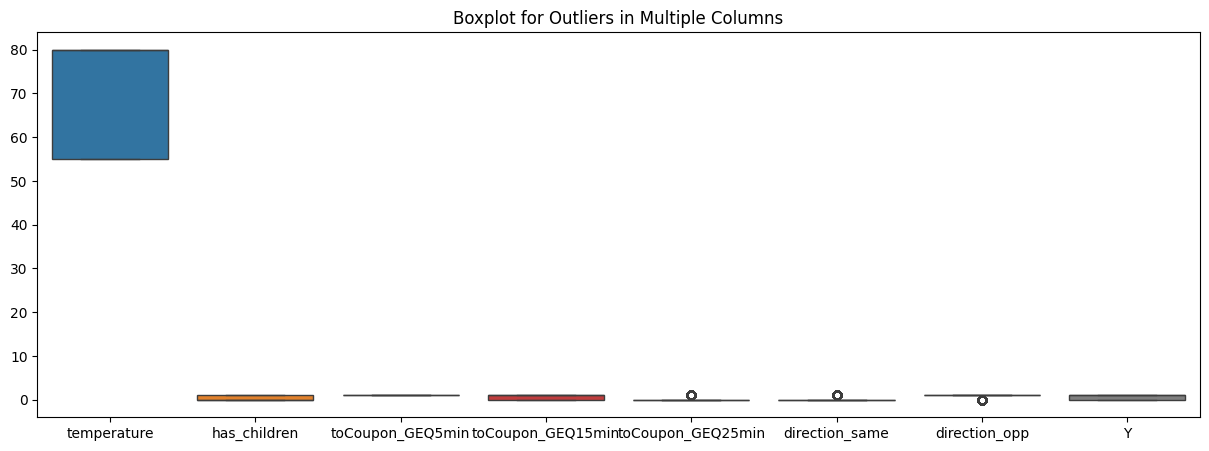

In [43]:
#boxplot for outlier identification
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Boxplot for Outliers in Multiple Columns")
plt.show()

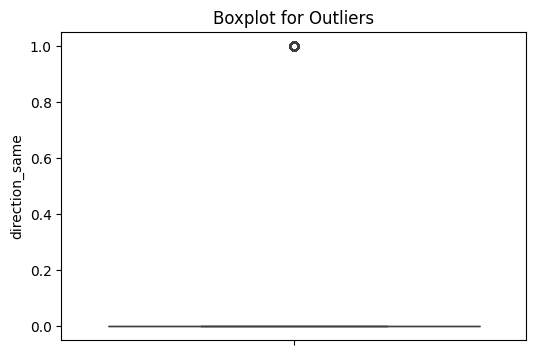

In [28]:
#individual boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['direction_same'])
plt.title("Boxplot for Outliers")
plt.show()

In [22]:
value_count = df[df['toCoupon_GEQ25min'] == 1].shape[0]
print(value_count)

601


In [24]:
value_count = df[df['direction_same'] == 1].shape[0]
print(value_count)

1079


In [26]:
value_count = df[df['direction_opp'] == 0].shape[0]
print(value_count)

1079


In [55]:
#this shows that direction_same and direction_opp are just compliments of each other.

In [56]:
df.drop(columns=['direction_opp'],inplace=True)